# Are students of color represented more than white students in this data set because of teacher / school safety biases?

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 1 - what is the race composition of the schools?
# This is difficult bc we only have the race of the students who had school safety or nypd called on, not the total # of students by race in a given school.

git_url_2016_2015 = 'https://raw.githubusercontent.com/desmondbera/team-81/main/data_sets/cleaned_data_sets/clean_df_2016-2015.csv'
df_2016_2015 = pd.read_csv(git_url_2016_2015)
print(df_2016_2015.columns)

Index(['Unnamed: 0', 'DBN', 'school_name', 'school_type',
       'administrative district',
       'american indian/alaskan native removals or suspensions resulting from incidents where nypd was contacted',
       'asian removals or suspensions resulting from incidents where nypd was contacted',
       'black removals or suspensions resulting from incidents where nypd was contacted',
       'hispanic removals or suspensions resulting from incidents where nypd was contacted',
       'white removals or suspensions resulting from incidents where nypd was contacted',
       'multi-racial removals or suspensions resulting from incidents where nypd was contacted',
       'unknown removals or suspensions resulting from incidents where nypd was contacted',
       'principal', 'removal', 'superintendent', 'expulsions',
       'female removals or suspensions resulting from incidents where nypd was contacted',
       'male removals or suspensions resulting from incidents where nypd was contacted'

In [ ]:
# 2 - after we group all students of color vs white students, how does that % breakdown?
# 3 - Is there a relationship between a school with more students of color and greater nypd_contacts + removals + expulsions?
# 4 - And vice versa, do we find that a school with more white students show less contact with nypd + school safety?


In [ ]:
Final thoughts:
    This question cannot be answered alone with this dataset. 
    We would need the total # of students along with the race breakdown in order to determine
    any meaningful insights.
    
    Further, at the moment we can at a glance see that the total of students of color
    will most likely be greater than white + unknown 'races'
    
    I suppose we can show this for each school (read: row) and show the total of students of color vs whites + unknown
    


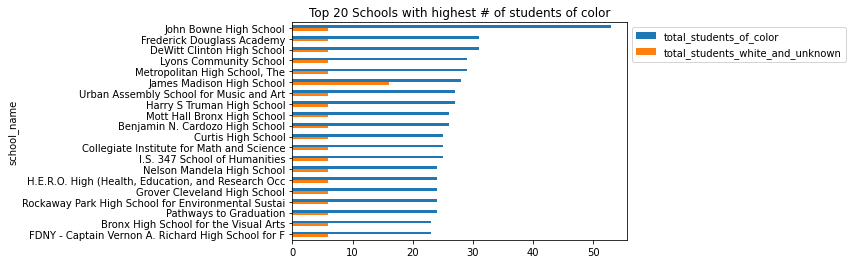

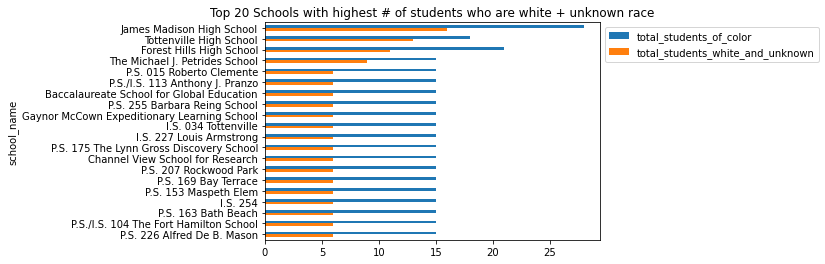

In [63]:
slim_df = (
    df_2016_2015[
        ['school_name', 
        'american indian/alaskan native removals or suspensions resulting from incidents where nypd was contacted',
        'black removals or suspensions resulting from incidents where nypd was contacted',
        'asian removals or suspensions resulting from incidents where nypd was contacted',
        'hispanic removals or suspensions resulting from incidents where nypd was contacted',
        'multi-racial removals or suspensions resulting from incidents where nypd was contacted',
        'white removals or suspensions resulting from incidents where nypd was contacted',
        'unknown removals or suspensions resulting from incidents where nypd was contacted'
        ]
    ]
)

students_of_color_totals = (
    slim_df['american indian/alaskan native removals or suspensions resulting from incidents where nypd was contacted'] 
    + slim_df['black removals or suspensions resulting from incidents where nypd was contacted']
    + slim_df['asian removals or suspensions resulting from incidents where nypd was contacted']
    + slim_df['hispanic removals or suspensions resulting from incidents where nypd was contacted']
    + slim_df['multi-racial removals or suspensions resulting from incidents where nypd was contacted']
)

students_of_white_and_unknown_totals = (
    slim_df['white removals or suspensions resulting from incidents where nypd was contacted']
    + slim_df['unknown removals or suspensions resulting from incidents where nypd was contacted']
)

# Create a new df with the school name, total of students of color, total of white+unknowns
final_df = df_2016_2015[['school_name']].copy()
final_df['total_students_of_color'] = students_of_color_totals
final_df['total_students_white_and_unknown'] = students_of_white_and_unknown_totals
# print(final_df)

# version 1 - takes the 1st row and plots it
# row_one = final_df.iloc[[0], [1, 2]]
# row_one.plot(kind='bar')

# version 2 - *BEWARE* This takes several mins bc it plots the entire dataframe. As a result it's also hard to read.
# final_df.plot.bar(x='school_name', rot=0)

# version 3 - a subsection (first 20 schools and last 20 schools)
# final_df.head(20).plot.bar(x='school_name')
# final_df.tail(20).plot.bar(x='school_name')

# version 4 - plots the top 20 schools with the highest # students of color 
top_20_students_of_color = final_df.sort_values(by='total_students_of_color', ascending=False)
top_20_students_of_color_inverted = top_20_students_of_color.head(20).plot.barh(x='school_name', title='Top 20 Schools with highest # of students of color')
top_20_students_of_color_inverted.invert_yaxis()
top_20_students_of_color_inverted.legend(bbox_to_anchor=(1.0, 1.0))

# version 5 - plots the top 20 schools with the highest students of white + unknown races
top_20_students_of_white_and_unknown = final_df.sort_values(by='total_students_white_and_unknown', ascending=False)
top_20_students_of_white_and_unknown_inverted = top_20_students_of_white_and_unknown.head(20).plot.barh(x='school_name', title='Top 20 Schools with highest # of students who are white + unknown race')
top_20_students_of_white_and_unknown_inverted.invert_yaxis()
top_20_students_of_white_and_unknown_inverted.legend(bbox_to_anchor=(1.0, 1.0))

# print(students_of_color_totals)
# print(students_of_white_and_unknown_totals)

# Is there a higher incidence of removal or expulsion for children of a certain race or gender?

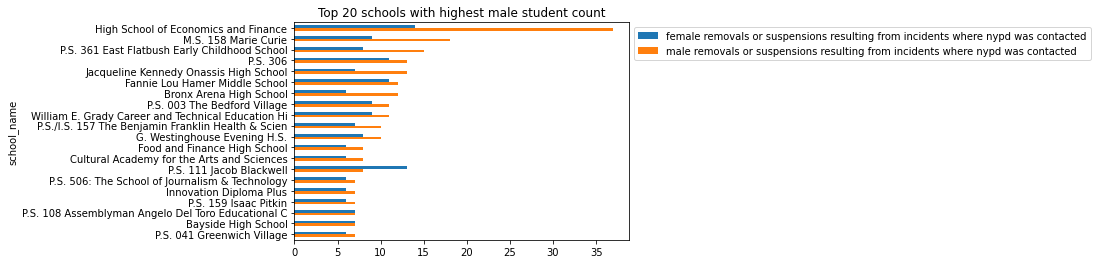

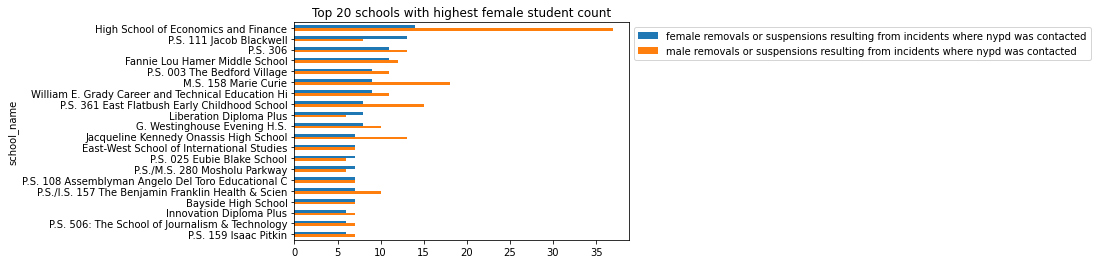

In [62]:
# NOTES: the race aspect of this question is addressed in the previous bar charts. 
# We can do a similiar visualization for gender here too (see below).

slim_df_two = (
    df_2016_2015[
        ['school_name', 
            'female removals or suspensions resulting from incidents where nypd was contacted',
             'male removals or suspensions resulting from incidents where nypd was contacted'
        ]
    ]
)

# print(slim_df_two)
final_df_two = (
    df_2016_2015[
        ['school_name', 'female removals or suspensions resulting from incidents where nypd was contacted',
             'male removals or suspensions resulting from incidents where nypd was contacted']
        ].copy()
)

top_20_male_students = final_df_two.sort_values(by='male removals or suspensions resulting from incidents where nypd was contacted', ascending=False)
# print(top_20_male_students)
top_20_male_students_inverted = top_20_male_students.head(20).plot.barh(x='school_name', title='Top 20 schools with highest male student count', legend='reverse')
top_20_male_students_inverted.invert_yaxis()
top_20_male_students_inverted.legend(bbox_to_anchor=(1.0, 1.0))

top_20_female_students = final_df_two.sort_values(by='female removals or suspensions resulting from incidents where nypd was contacted', ascending=False)
top_20_female_students_inverted = top_20_female_students.head(20).plot.barh(x='school_name', title='Top 20 schools with highest female student count')
top_20_female_students_inverted.invert_yaxis()
top_20_female_students_inverted.legend(bbox_to_anchor=(1.0, 1.0))